In [13]:
!./test.py


------------------------------------------------
files are stored in: ./output_data/wdir3/
initial orientation: p = (-1,0)
k=2	om=20	alpha=1
iteration 0
^C


In [1]:
os.system?

Signature: os.system(command)
Docstring: Execute the command in a subshell.
Type:      builtin_function_or_method


In [2]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt

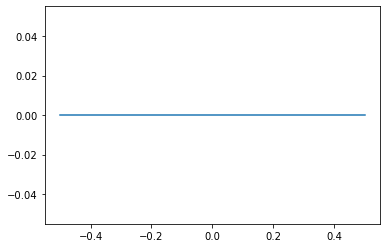

In [56]:
#in this cell we're going to try and read the content of one of those .ff files

file = open("./output_data/wdir24/fiber0.ff", 'r')
data = np.fromfile(file, dtype=float)
Ns = 200
position = data[0:2*(Ns+1)]
velocity = data[2*(Ns+1): 4*(Ns+1)]
fluid = data[4*(Ns+1):]
position = position.reshape(Ns+1,2).T
fluid = fluid.reshape(Ns+1, 2).T
plt.plot(position[0], position[1])


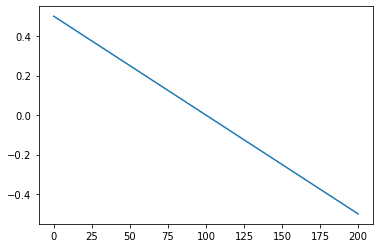

In [57]:
plt.plot(position[0])

In [58]:
state = (position, velocity, fluid)


In [69]:
pi = [0, 1, 2, 4, 4]





In [70]:
det_to_sto_policy(pi)

array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.]])

In [73]:
#compute center of mass

def get_center(state):
    return state[0].mean(axis=1)

def get_orientation(state):
    return [state[0][0,0] - get_center(state)[0], state[0][1,0] - get_center(state)[1]]

def compute_observation(state, u0=0.1):
    center = get_center(state)
    orientation = get_orientation(state)[0] > 0
    wind = (fluid[0,0] > -u0) + (fluid[0,0] > u0)
    return wind + 3 * orientation

def det_to_sto_policy(pi, number_of_actions = 7):
    number_of_states = len(pi)
    Pi = np.zeros((number_of_states, number_of_actions))
    for s in range(number_of_states):
        Pi [s, pi[s]] = 1 
    return Pi

def select_action(state, Pi):
    prob = Pi[state]
    return np.random.choice(np.arange(1,8), p=prob)





#discretize wind where?

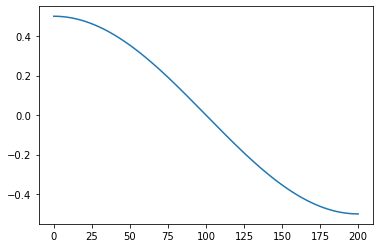

In [66]:
plt.plot(fluid[1])

In [60]:
compute_observation(state)

4

In [41]:
get_center(state)

array([5.03190175e-05, 6.54201459e-06])

In [42]:
orientation(state)

[0.49578974288569116, 0.0034368337535699615]

# a second step


In [14]:
import os
def mkwdir(where='../output_data'):
    counter = 0
    while os.path.isdir(where + '/wdir' + str(counter)): #improvement: use os.path.join()
        counter += 1
    path = where + '/wdir' + str(counter)
    os.makedirs(where + '/wdir' + str(counter))
    return path
    

def swim(wdir, iteration, action, nswim=10):
    os.system('../runs/bin/swim -dir ' + wdir + ' -it ' + str(iteration) + ' -a ' + str(action) + '-nsw ' + str(nswim))
    


In [15]:
wdir = '../output_data/'
swim(wdir, 4, 0)

In [29]:
mkwdir()

'../output_data/wdir0'

In [17]:
def write_command(exec, **kwargs):
    command = exec
    for key, value in kwargs.items():
        command = command + " --" + key + " " + str(value)
    return command
    


In [12]:
exec = "./pgsthsth"
args = {"outdir":"../output?bla", "length":1, "zeta":5e3}

In [24]:
from utils import *
wdir = mkwdir()

In [28]:
write_command(exec, wdir, outdir='../output/pla', zeta=5e3, length=1)

'./pgsthsth --outdir ../output/pla --zeta 5000.0 --length 1'